# **AP157 Machine Learning Lab Assignment**
### Module B2 - Part 1: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Chris Andrew\
_Student No._: 2019-02636\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: April 18, 2024 (11:59 PM)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Chris Andrew Mendoza

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


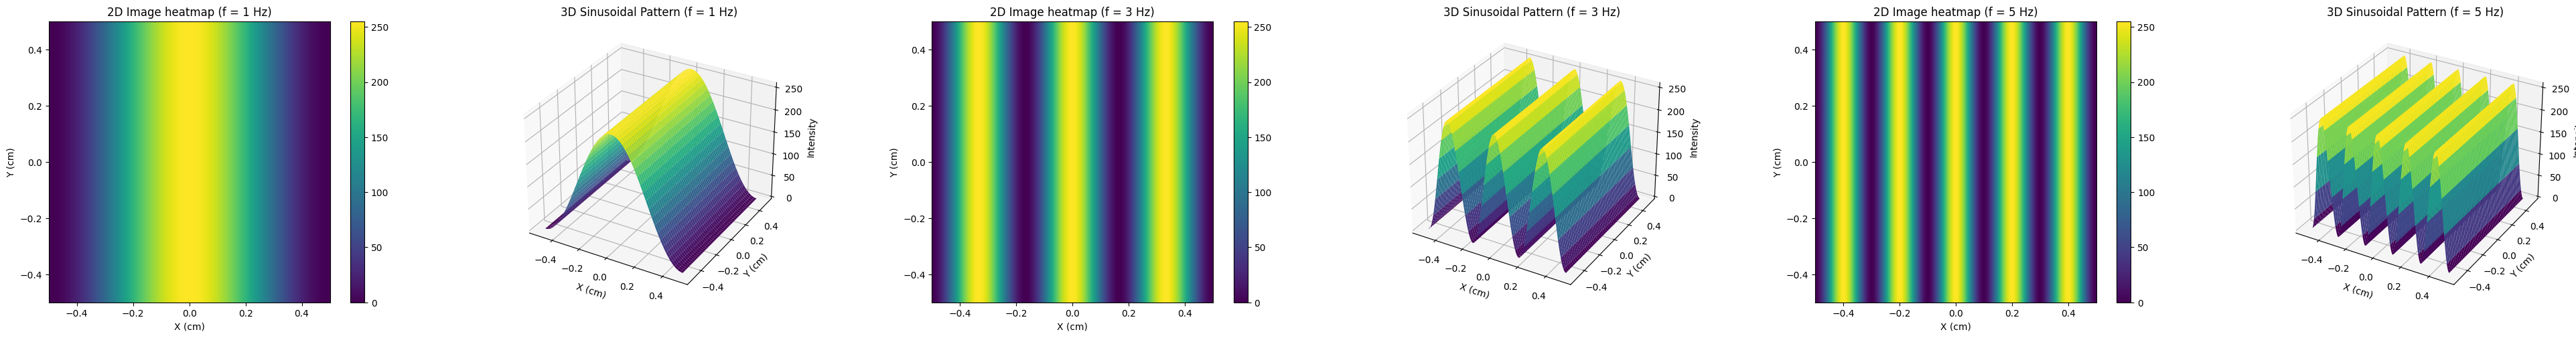

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

size_cm = 1  # use in linspace to set optical element size to 1 cm x 1 cm
image_size = 400  # use in linspace to set the size of each image to be 400x400 pixels
x = np.linspace(-size_cm/2, size_cm/2, image_size)  # size_cm is divided by 2 in order to center the images at the origin. x is going to be the array of points for the x coordinate values in the meshgrid.
y = x # y is set equal to x so that the array will have the same size as x. y will hold the y values in the meshgrid
X, Y = np.meshgrid(x, y) #create meshgrid w/ x and y as the coordinates

freq = [1, 3, 5]    # frequencies assigned to be used in plotting
fig, axes, = plt.subplots(nrows=1, ncols=6, figsize=(40, 5))
c2D=0 #counter for 2D plots
c3D=1 #counter for 3D plots

print(axes)
for i in freq:   #used for loop to plot the 3 pairs of 2d and 3d plots for the 3 different frequencies
    z = np.cos(2 * np.pi * X * i)   #Equation for sinusoid
    z2 = np.interp(z, (z.min(), z.max()), (0, 255)) # maps the orginal values in the variable z to the range 0-255.

    # Plot 2D Sinusoidal Pattern
    im = axes[c2D].imshow(z2, cmap='viridis', extent=[-size_cm/2, size_cm/2, -size_cm/2, size_cm/2])
    axes[c2D].set_title("2D Image heatmap (f = {} Hz)".format(i))
    plt.colorbar(im)
    axes[c2D].set_xlabel('X (cm)')
    axes[c2D].set_ylabel('Y (cm)')

    # Plot 3D Sinusoidal Pattern
    axes[c3D].remove()
    axes[c3D]= fig.add_subplot(1,6,c3D+1, projection='3d')
    axes[c3D].plot_surface(X, Y, z2, cmap='viridis')
    axes[c3D].set_title('3D Sinusoidal Pattern (f = {} Hz)'.format(i))
    axes[c3D].set_xlabel('X (cm)')
    axes[c3D].set_ylabel('Y (cm)')
    axes[c3D].set_zlabel('Intensity')

    c2D += 2  # +2 for 2D plot counter
    c3D += 2  #+2 for 3D plot counter
plt.tight_layout()
plt.show()


# **DISCUSSION**

**Note: Please click on the output to enlarge it if you cannot see the labels clearly**

For the 2D plots, it can be seen with the help of the heatmap that the peaks of the sinusoids are represented by the bright area of the plot (or bright fringes if we can call them that) while the troughs are represented by the dark areas (or dark fringes). For f = 1 cycle/cm, we only see 1 peak while we observe 3 peaks for f = 3 cycles/cm and 5 peaks for f = 5 cycles/cm. It can be concluded that the frequencies were plotted correctly as the definition of a complete cycle for a wave is either a peak-to-peak or a trough-to-trough distance is propagated. If we were to disregard the peaks and look at the the troughs, for example, for f = 3 cycles/cm, we can see that there 3 trough-to-trough segments, hence the frequency is indeed 3 cycles/cm.

The same can be observed in the 3D plots with the added advantage that the physical representation of the differences of intensity values at each point along the x-axis can be better appreciated here. Notice that the intensity values range from 0 to 255 in both the 2D and 3D plots. This is due to the fact that we remapped the values of z to the range 0 t0 255 in order to make more sense presentation-wise (used z2 instead of z in plotting).

In order to create a sinusoid, it was necessary to assign different intensity values for the X points in the meshgrid, hence, it can be seen that X was actually used for the sinusoid equation. The meshgrid can actually be thought of as an actual grid where we can plot our intensity values on. Think of it as an empty canvas and the intensity values (w/c actually represent the amplitudes of each point of the sinusoid) as the paint. Notice that even though Y (meshgrid) was not used in the sinusoid equation, we still get a completely filled plot. Why? It is because when we plot the images, what the code does is it sets the intensity value for each X point. For example, at X = 0, it sets the intensity value to be 255 for all Y points. The code does not explicitly assign values to Y but instead, it overlays intensity values on the meshgrid and that is how we get the resulting plots.

** **
Credits:

**Sir Sean Julian Fortuna** - for helping me arrange my plots so that they can all be displayed in 1 axis only (1 row, 6 columns)

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

y-value: 1.4999999999999998


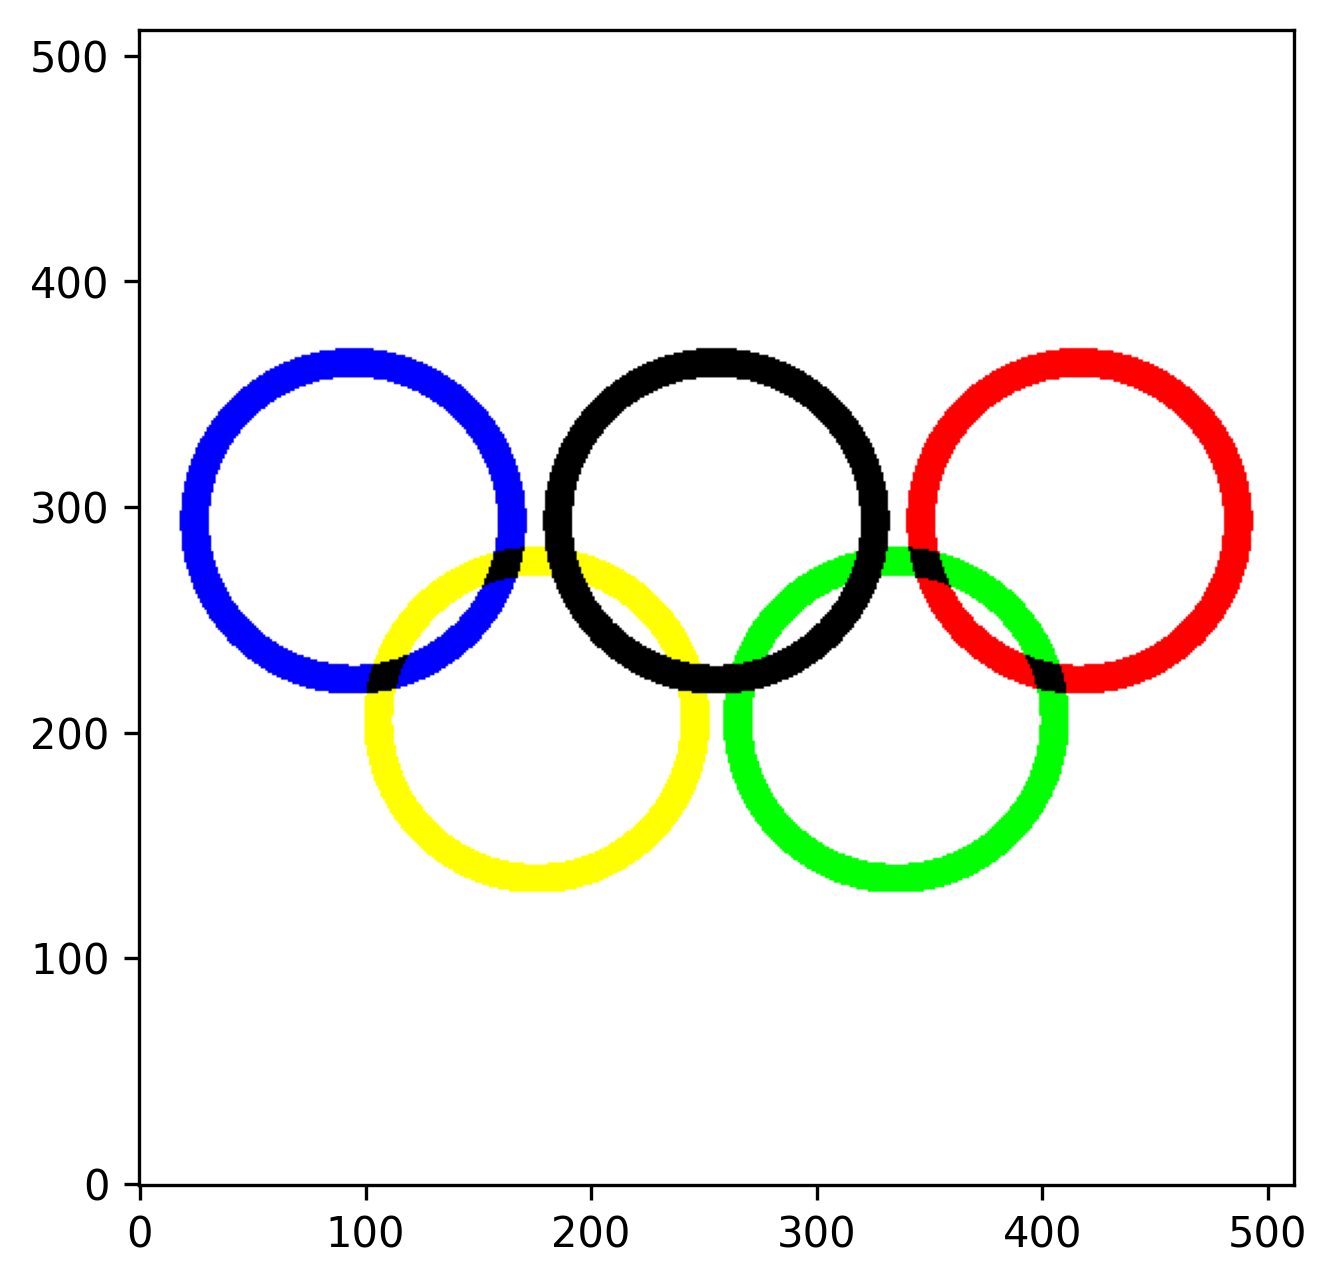

In [4]:
# Define the number of points along x and create a meshgrid
N = 512
x = np.linspace(-10, 10, num=N)
y = x
X, Y = np.meshgrid(x, y)

# Initialize arrays for the 5 rings
Blk, Yw, Gn, Rd, Bl = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N))

# Draw colored circles
Rt, Rc, deg = 3, 3, 30

# Calculate the coordinates of the center of the colored circles
xt, yt = Rt * np.cos(deg * np.pi / 180), Rt * np.sin(deg * np.pi / 180)
print("y-value: " + str(yt))

# Calculate the distance from each point to the center of each circle and set color channels
R = np.sqrt((X) ** 2 + (Y - 2*Rt+3*1.4999999999999998) ** 2)
Blk[np.where((R < Rc) & (R > Rc-0.5)) ] = 1.0

R = np.sqrt((6.3+X) ** 2 + (Y - 2*Rt+3*1.4999999999999998) ** 2)
Rd[np.where((R < Rc) & (R > Rc-0.5)) ] = 1.0

R = np.sqrt((6.3-X) ** 2 + (Y - 2*Rt+3*1.4999999999999998) ** 2)
Bl[np.where((R < Rc) & (R > Rc-0.5)) ] = 1.0

R = np.sqrt((X - 1.2*xt) ** 2 + (Y - 1.7*yt+3*1.4999999999999998) ** 2)
Gn[np.where((R < Rc) & (R > Rc-0.5))] = 1.0

R = np.sqrt((X + 1.2*xt) ** 2 + (Y - 1.7*yt+3*1.4999999999999998) ** 2)
Yw[np.where((R < Rc) & (R > Rc-0.5))] = 1.0

# Create a 3D array to represent the RGB image
I_rgb = np.ones((N, N, 3))
I_rgb[..., 0] -= Blk + Gn + Rd
I_rgb[..., 1] -= Blk + Rd + Bl
I_rgb[..., 2] -= Blk + Yw + Gn + Bl

# Plot the RGB image
plt.figure(figsize=(5, 5), dpi=300)
plt.grid(color='none', linestyle='--', linewidth=0.5)  # Add grid
plt.imshow(I_rgb, origin='lower')
plt.show()

# **DISCUSSION**

Before creating the shape of the rings itself, it was necessary to position the center of each circle so that they are arranged as in the olympics logo. This was done by manually manipulating the equation for the radius (e.g. np.sqrt((X) ** 2 + (Y - 2*Rt+3*1.4999999999999998) ** 2)). The coordinates of each center was determined through trial and error as the equation for the radius R also depended on Rt which is the distance from the center of all circles (NOT of each circle; it can also be called the center of the olympic logo image).

Once the position of each individual circle is set, the solid part of the rings were plotted by using the np.where() function such that only when the radius of each circle reaches the designated parameter values are they allowed to have a value of 1. The rest of the radius will have a value of 0, making the empty "hole" of the ring.

Lastly, in order to add the designated colors to each ring, it was first necessary to set the 3D array values to ones in order to produce a white image on which we will perform **color subraction**. In performing the subtraction, we take not that I_rgb[..., 0] represents the Red color channel, I_rgb[..., 1] the Green color channel, and I_rgb[..., 2] the Blue color channel. Thus, for example, if we want to get the green ring on the logo, we only have to subtract the green ring array from the Red and Blue color channels. Meanwhile if we want to get the black ring, we need to subtract the black ring array from all 3 color channels as black is the absence of all colors. In essence, the basic idea behind color subtraction (in this case) is that starting with the color white, you ask yourself what colors would you subtract from it in order to get your desired color. Consulting the color wheel guide has proven very useful when doing this.

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

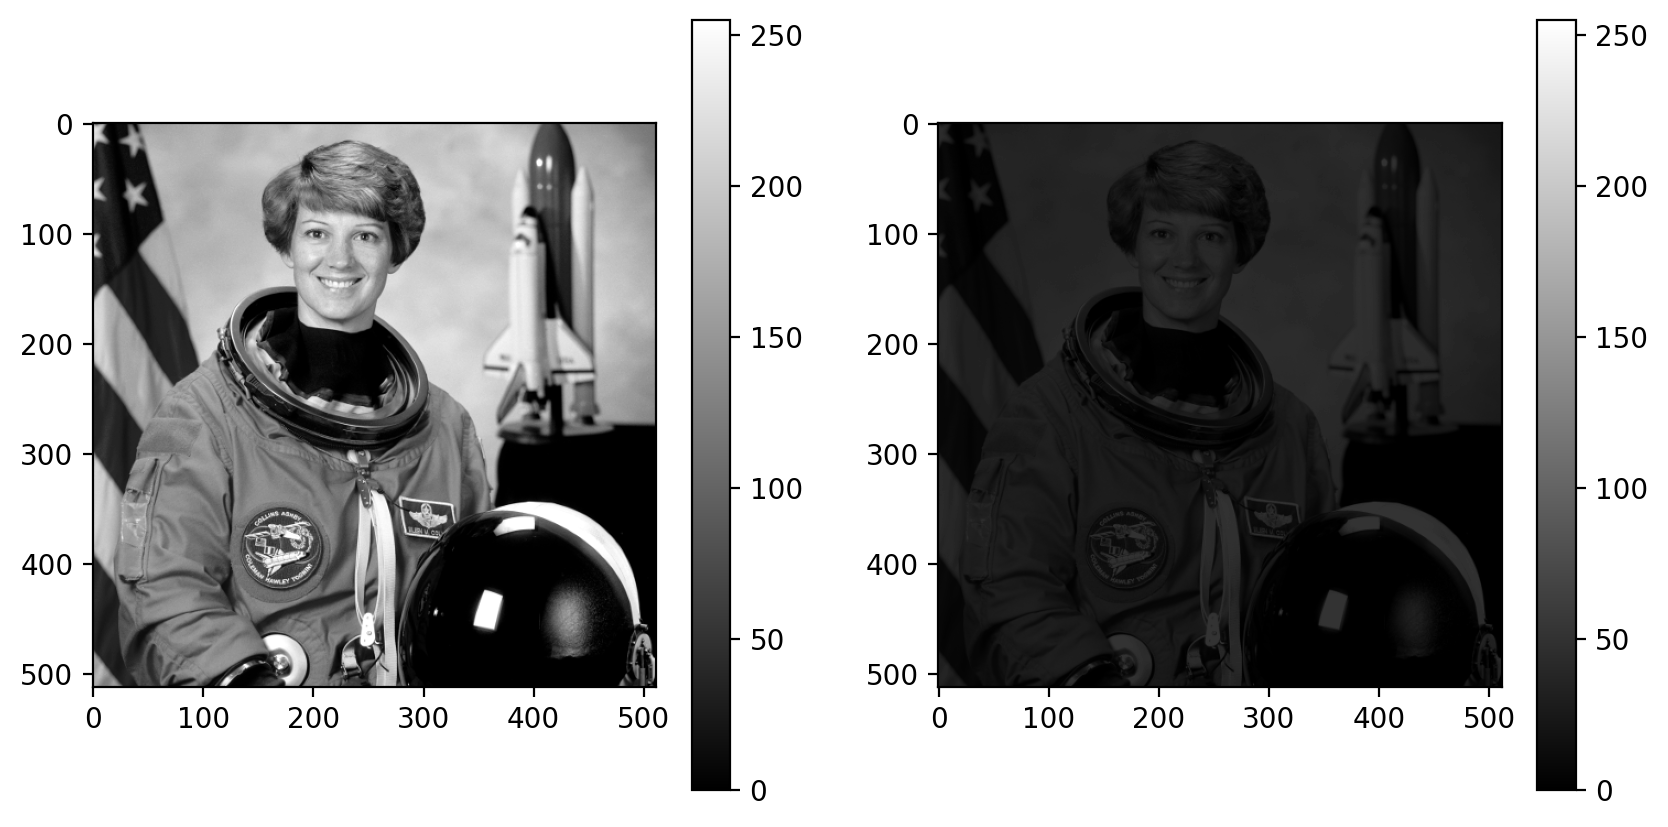

In [ ]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

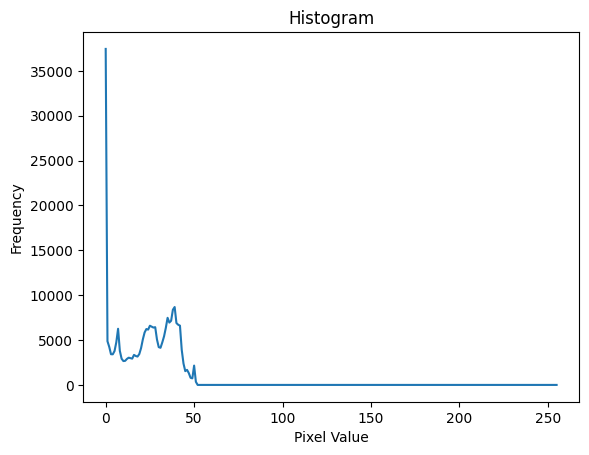

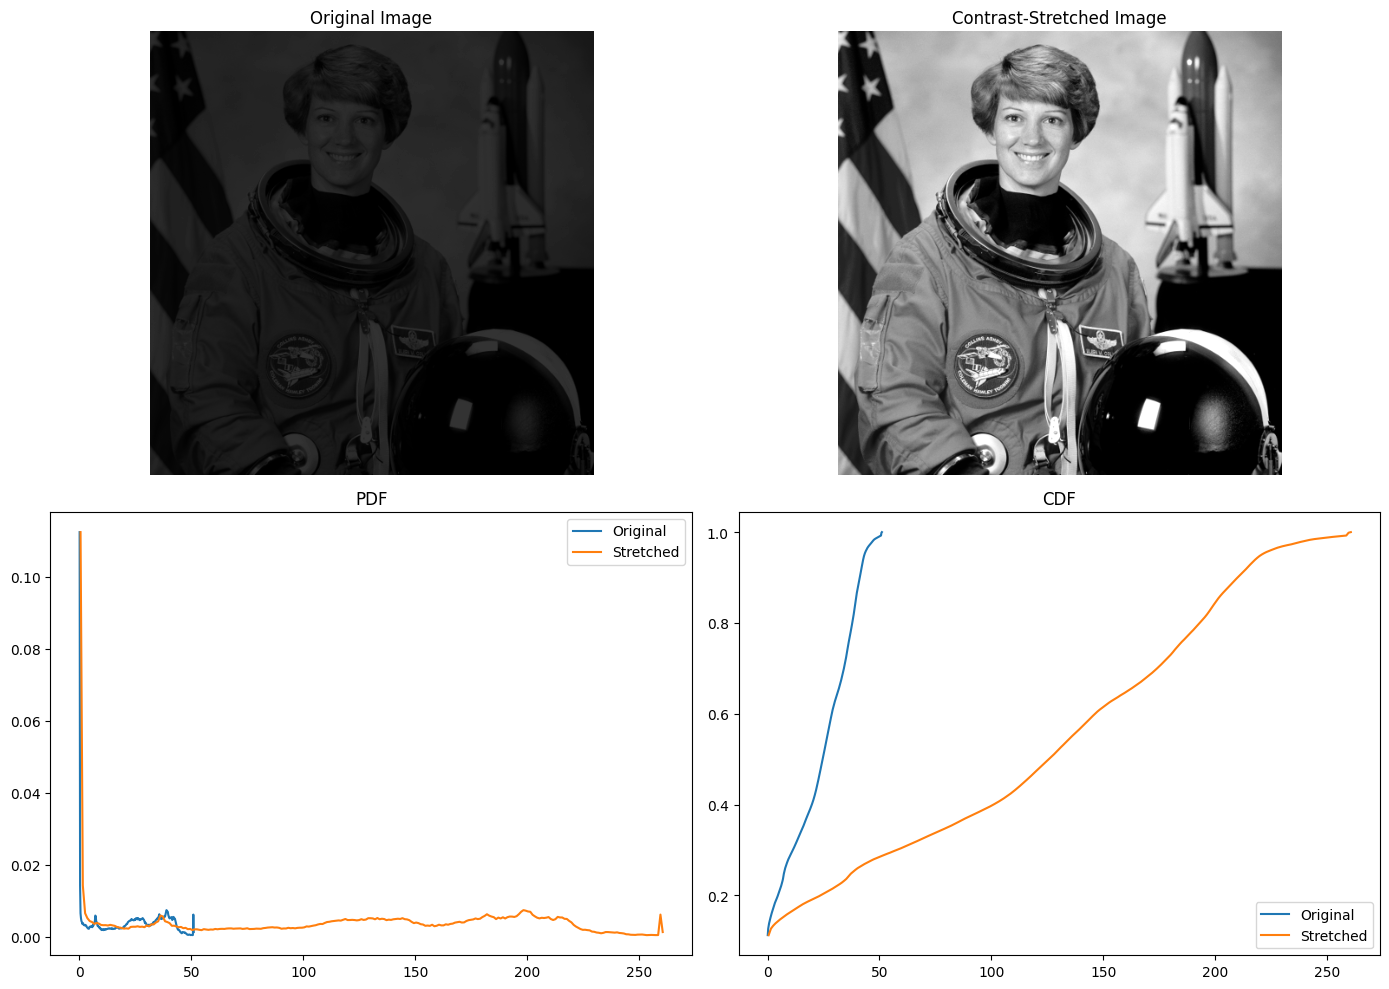

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, data, exposure

# Original image
img = color.rgb2gray(data.astronaut()) * 256

# Low contrast image
img_low_contrast = img / 5

# Compute the histogram
hist, bins = np.histogram(img_low_contrast.ravel(), bins=256, range=[0,256])

# Plot the histogram
plt.plot(hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

# Contrast stretching
L=0;
H=50;
img_stretched = (255/(H-L)* (img_low_contrast - L))

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Original image
axes[0, 0].imshow(img_low_contrast, cmap='gray', vmax=255)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Contrast-stretched image
axes[0, 1].imshow(img_stretched, cmap='gray', vmax=255)
axes[0, 1].set_title('Contrast-Stretched Image')
axes[0, 1].axis('off')

# PDF of original and stretched image
hist_orig, bins_orig = exposure.histogram(img_low_contrast)
axes[1, 0].plot(bins_orig, hist_orig / hist_orig.sum(), label='Original')
hist_stretched, bins_stretched = exposure.histogram(img_stretched)
axes[1, 0].plot(bins_stretched, hist_stretched / hist_stretched.sum(), label='Stretched')
axes[1, 0].set_title('PDF')
axes[1, 0].legend()

# CDF of original and stretched image
cdf_orig, bins_cdf_orig = exposure.cumulative_distribution(img_low_contrast)
axes[1, 1].plot(bins_cdf_orig, cdf_orig, label='Original')
cdf_stretched, bins_cdf_stretched = exposure.cumulative_distribution(img_stretched)
axes[1, 1].plot(bins_cdf_stretched, cdf_stretched, label='Stretched')
axes[1, 1].set_title('CDF')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


# **DISCUSSION**

In order to perform contrast stretching it was first necessary to know the range of pixel values of the original image in which the frequency was non-zero. With the range known, we then apply the contrast stretching equation: img_stretched = (255/(H-L)* (img_low_contrast - L)) wherein H is the highest pixel value with a non-zero frequency while L is the lowest pixel value with a non-zero frequency.

In the PDF plot, we can see that the PDF of the original value is cramped to the leftmost portion only which is why the image has a dark appearance. The PDF of the contrast stretched image however now covers the full range of pixels, hence, the resulting contrast stretched image is brighter.

For the CDF plot, it can be observed that the CDF of the original image has a steep slope at the beginning and then abruptly flatlines. In order to have a more "aesthetic" image, it is necessary to have linear CDFs. Hence, we see that the CDF of the contrast stretched image is actually more linear and has a less steep slope as the CDF increases steadily.